# Using Data Science To Find the Perfect Vacation Spot.

<strong>Blog Version: </strong><a href="https://www.daikiminaki.com/2019/01/07/using-data-science-to-find-the-perfect-vacation-spot/">Using Data Science To Find The Perfect Vacation Spot.</a><br>
<strong>Github: </strong> https://github.com/daikiminaki/<br>
<strong>iPython Notebook: </strong><a href="https://www.daikiminaki.com/notebooks/tourism_analysis.html">Analysis Notebook</a><br>
<strong>More Like This: </strong> https://www.daikiminaki.com/

### About Me:
My name is Daiki Minaki. I am an avid traveler and I love exploring new places, learning about new cultures, and eating exotic foods.  I was born and raised in California but attended university in Tokyo at Waseda University Class of 2018.  One of my favorite countries I have traveled to so far is Vietnam.  What I loved about Vietnam is how up-and-coming it feels, the amazing people, the authenticity and PRICE.  I found it amazing how I could eat amazing food, take small trips, stay in relatively nice hostels all and easily stay under $50 a day.

In Vietnam, you never have to think about the price. You can just get what you want and I really loved that.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import glob as glob
import quandl

### Why I decided to do this.
I am currently enrolled in a Data Science Program learning the ins-and-outs of data science.  I have thoroughly enjoyed learning how to take data and turn it into somethings more understandable.  Being an economics major I was always turning people and countries into data and numbers but data science has gives the tools to turn data into people.  

### Why Travel?
I thought it would be an awesome opportunity to use this new found skill to answer questions that I found interesting like where should I travel to next?

### My Criteria: What kind of places do I like?
To find the perfect vacation spot, I need to understand what I liked about my past travels and use this as a criteria to narrow down my options.  As stated before Vietnam was my favorite trip so far so I will base a lot of my criteria on memorable aspects from that trip.

My Criteria:
- Low Cost
- Relatively Untapped
- Not Too Underdeveloped
- New
- Safe
- Fun

### About the Data:
This data is from <a href="https://data.worldbank.org/">World Bank Open Data</a><br>
This is a trustworthy source and although it is difficult to get true measures in many of the less developed countries this is probably one of the most reliable sources and it is also easy to access.  If I am interested in economic data or just want to learn more about a country I will usually start off by checking WorldBank.

In specific I am looking at indicators related to tourism and PPP:<br>
- Tourism Counts
    - International tourism, number of arrivals (2016)
    - International tourism, number of arrivals change over past 10 years<br>
- Purchasing Power Parity (PPP)

*If you decide to do an analysis of potential trip ideas the data you use may vary depending on your criteria.

### Import Tourism Summary Data
This is actually data I wrangled in a different notebook so if you are interested in seeing how I took the original World Bank Data and summarized it to make it easier to use comment or message me and I can definitely post that.

In [220]:
tourism_data = pd.read_csv('data/tourism_summary.csv').drop(columns=['Unnamed: 0'])
tourism_meta = pd.read_csv('data/tourism_meta.csv').drop(columns=['Unnamed: 0'])

In [201]:
#During Initial Analysis I found that the data also had non-country values so I decided to categorize everything in case.
main_regions = ['World','Europe & Central Asia','East Asia & Pacific','North America',\
               'Latin America & Caribbean','Middle East & North Africa','Central Europe and the Baltics',\
               'South Asia','Sub-Saharan Africa']

all_region_vars = ['World','Europe & Central Asia','East Asia & Pacific','East Asia & Pacific (excluding high income)',\
               'East Asia & Pacific (IDA & IBRD countries)','North America','Euro area','Latin America & Caribbean',\
              'Middle East & North Africa','Europe & Central Asia (IDA & IBRD countries)', 'Arab World',\
               'Latin America & the Caribbean (IDA & IBRD countries)', 'Latin America & Caribbean (excluding high income)',\
               'Central Europe and the Baltics', 'Europe & Central Asia (excluding high income)',\
               'South Asia', 'South Asia (IDA & IBRD)','Sub-Saharan Africa (IDA & IBRD countries)',\
               'Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)', 'Small states',\
               'Other small states','Heavily indebted poor countries (HIPC)','Least developed countries: UN classification'\
               'Middle East & North Africa (excluding high income)', 'Middle East & North Africa (excluding high income)',\
                'Middle East & North Africa (IDA & IBRD countries)','Least developed countries: UN classification']

income_vars = ['High income','Upper middle income','Middle income','Lower middle income','Low & middle income',\
              'Low income',]

grouping_vars = ['OECD members','European Union','IDA & IBRD total','IBRD only', 'IDA total',\
                 'Fragile and conflict affected situations','IDA blend']

divident_vars = ['Pre-demographic dividend','Early-demographic dividend','Late-demographic dividend', \
                 'Post-demographic dividend']

all_non_country = all_region_vars + income_vars + grouping_vars + divident_vars

In [15]:
#The summary data I put together contains the latest value (2016) and 10yr growth data so I decided to separate them out.
tourism_recent = ['tourism_expenditure_passenger_items_2016','tourism_reciept_perc_exports_2016','tourism_expenditure_perc_2016',\
                 'tourism_receipt_usd_2016','tourism_expenditure_travel_items_usd_2016','tourism_expenditure_usd_2016',\
                 'tourism_receipt_passegner_items_2016','tourism_arrival_count_2016','tourism_departure_count_2016',\
                 'tourism_receipt_travel_items_2016']

tourism_change = ['tourism_expenditure_passenger_items_10_yr_change','tourism_reciept_perc_exports_10_yr_change','tourism_expenditure_perc_10_yr_change',\
                 'tourism_receipt_usd_10_yr_change','tourism_expenditure_travel_items_usd_10_yr_change','tourism_expenditure_usd_10_yr_change',\
                 'tourism_receipt_passegner_items_10_yr_change','tourism_arrival_count_10_yr_change','tourism_departure_count_10_yr_change',\
                 'tourism_receipt_travel_items_10_yr_change']

## Most Popular Tourist Destinations
First I want to look at the destinations that the majority like to go to.  Because I am using a fairly limited amount of data which won't cover all the criteria I have decided to make some assumptions about the arrival data.

<strong>Assumptions about high tourism countries:</strong>
- Not too underdeveloped: Most people are afraid to get too out of their comfort zones.
- Safe: If it was dangerous, people would not go.
- Fun: Many Attractions (Beaches, Landmarks, Big Cities, etc)

In a lot of cases tourism can be a large driving factor for economic growth and countries will invest to make their country more appealing to tourists.  This can include everything from adding more attractions, improving infrastructure, improving safety, improving sanitation, etc.

In [202]:
#Get Countries by Tourism Arrival Counts
most_popular_tourism = tourism_data[~tourism_data.country_name.isin(all_non_country)][['country_name','tourism_arrival_count_2016']].dropna().sort_values('tourism_arrival_count_2016', ascending=False)

In [203]:
#Add Rank Information
most_popular_tourism = most_popular_tourism.reset_index(drop=True).reset_index()
most_popular_tourism.columns = ['tourism_count_rank','country_name', 'tourism_arrival_count_2016']
most_popular_tourism['tourism_count_rank'] = most_popular_tourism['tourism_count_rank'] + 1

In [206]:
most_popular_tourism.head(13)

,tourism_count_rank,country_name,tourism_arrival_count_2016
0,1,France,82570000.0
1,2,United States,75608000.0
2,3,Spain,75315000.0
3,4,China,59270000.0
4,5,Italy,52372000.0
5,6,United Kingdom,35814000.0
6,7,Germany,35555000.0
7,8,Mexico,35079000.0
8,9,Thailand,32530000.0
9,10,Turkey,30289000.0


## Cheapest Destinations
Because I am still a student, money is a HUGE factor in decided where I can travel.  (If money was no object you would never see me again). A good way to gauge cost of living in a country, and the metric I chose to determine the affordability to countries is the PPP or purchasing power parity.

In [221]:
macroeconomics_summary = pd.read_csv('data/macroeconomics_summary.csv').drop(columns=['Unnamed: 0'])
macroeconomics_meta = pd.read_csv('data/macroeconomics_meta.csv').drop(columns=['Unnamed: 0'])

### Purchasing Power Parity (PPP)
Brief Description: PPP essentially tells us how far your dollar will go in a given country.  The classic example for this is a Big Mac.  Big Macs are the same in every country but the price is relative to the power of the currency in that country or the PPP.  

Higher PPP means that a dollar (or your currency) will go further or have more purchasing power in that country.

New Source: https://www.quandl.com/data/ECONOMIST-The-Economist-Big-Mac-Index

In [222]:
#Format PPP File
ppp = pd.read_excel('data/ppp_by_gdp.xls', encoding='utf-8')
ppp.columns = ppp.loc[2]
ppp = ppp.loc[3:]
ppp = ppp[['Country Name',2005.0]].sort_values(2005, ascending=False)
ppp = ppp.reset_index(drop=True)
ppp = ppp.reset_index()

In [223]:
#Rank Countries by PPP
ppp.columns = ['ppp_rank','country_name','2005']
ppp.ppp_rank = ppp.ppp_rank + 1
ppp_rankings = ppp.dropna()

## PPP and Popularity
With the PPP and arrival (popularity) data we can now try to find countries that fit into our criteria:
- Low Cost (High PPP)
- Fairly Popular (High Arrivals)

I decided to highlight the areas of interest.  The overlapped area of the plot which represents countries that ranked highly in both PPP (Low Cost) and Arrivals (High Popularity)

In [224]:
#Population and Price Dataset
tourism_price_vs_popularity = most_popular_tourism.merge(ppp_rankings)

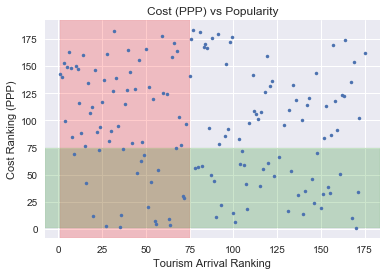

In [226]:
_ = plt.plot(tourism_price_vs_popularity.tourism_count_rank, tourism_price_vs_popularity.ppp_rank, linestyle='none', marker='.')
_ = plt.title('Cost (PPP) vs Popularity')
_ = plt.axvspan(1, 75, color='red', alpha=0.2)
_ = plt.axhspan(1, 75, color='green', alpha=0.2)
_ = plt.xlabel('Tourism Arrival Ranking')
_ = plt.ylabel('Cost Ranking (PPP)')
_ = plt.savefig('tourism_2_price_v_popularity')

### Countries that fit our criteria so far.
This is the list of the countries in the overlapped area ordered by popularity

In [227]:
tourism_price_vs_popularity[(tourism_price_vs_popularity.tourism_count_rank < 75) & (tourism_price_vs_popularity.ppp_rank < 75)][['country_name','tourism_count_rank','tourism_arrival_count_2016','ppp_rank','2005']]

,country_name,tourism_count_rank,tourism_arrival_count_2016,ppp_rank,2005
8,Thailand,9,32530000.0,69,15.932102
15,Japan,16,24040000.0,42,129.551955
19,"Korea, Rep.",20,17242000.0,12,788.920135
22,India,23,14569000.0,73,14.668542
26,Indonesia,27,11519000.0,3,3934.263554
34,Vietnam,35,10013000.0,2,4712.688208
35,Belarus,36,9423500.0,13,779.325783
36,Czech Republic,37,9321000.0,74,14.316236
43,Kazakhstan,45,6509000.0,52,57.606840
45,Philippines,47,5967000.0,63,21.754887


## PPP and Popularity Growth
Another part of my criteria was to find a country that has an up-and-coming tourist market. To do this I will be looking at ppp and popularity growth.

In [208]:
#Sort by Popularity Growth
tourism_growth = tourism_data[~tourism_data.country_name.isin(all_non_country)][['country_name','tourism_arrival_count_10_yr_change']].dropna().sort_values('tourism_arrival_count_10_yr_change',ascending=False)

In [209]:
#Rank by Popularity Growth
tourism_growth_rankings = tourism_growth.reset_index(drop=True).reset_index()
tourism_growth_rankings.columns = ['tourism_growth_rank','country_name','tourism_arrival_count_10_yr_change']
tourism_growth_rankings['tourism_growth_rank'] = tourism_growth_rankings['tourism_growth_rank'] + 1

In [210]:
#Merge Popularity Growth Rank with PPP Rank.
tourism_growth_vs_ppp = tourism_growth_rankings.merge(ppp_rankings)

### PPP and Popularity Growth
The plot below shows relationship of country ppp and popularity growth by ranking.  Again we want to focus on high growth, cheap countries so we will look only at the countries in the overlapped area.

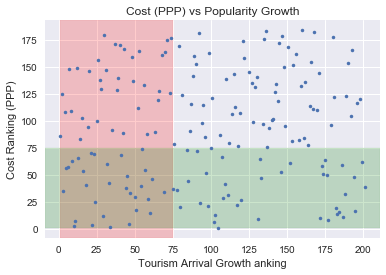

In [228]:
_ = plt.plot(tourism_growth_vs_ppp.tourism_growth_rank, tourism_growth_vs_ppp.ppp_rank, linestyle='none', marker='.')
_ = plt.title('Cost (PPP) vs Popularity Growth')
_ = plt.axvspan(1, 75, color='red', alpha=0.2)
_ = plt.axhspan(1, 75, color='green', alpha=0.2)
_ = plt.xlabel('Tourism Arrival Growth anking')
_ = plt.ylabel('Cost Ranking (PPP)')
_ = plt.savefig('tourism_4_price_v_popularity_growth')

### Top 15 Places by Growth and Cost

In [212]:
growth_and_price = tourism_growth_vs_ppp[(tourism_growth_vs_ppp.tourism_growth_rank < 75) & (tourism_growth_vs_ppp.ppp_rank < 75)]
growth_and_price[['country_name','tourism_growth_rank','ppp_rank','2005','tourism_arrival_count_10_yr_change']].head(15)

,country_name,tourism_growth_rank,ppp_rank,2005,tourism_arrival_count_10_yr_change
2,Benin,3,35,219.584704,0.993028
4,Jamaica,5,56,37.289520,0.990476
5,Sri Lanka,6,57,35.170179,0.989260
8,Philippines,9,63,21.754887,0.986869
9,Indonesia,10,3,3934.263554,0.985849
10,Cambodia,11,7,1278.551591,0.985764
12,"Macedonia, FYR",13,66,18.389141,0.982996
15,Albania,16,54,43.639880,0.980965
16,Armenia,18,41,178.580472,0.979194
19,Bhutan,21,70,15.738848,0.977213


### ... But Are these countries growing because they are originally very small?

We don't want to go somewhere whos tourism market is too untapped so let's also integrate tourism count to this to find the ideal place: <br>
<strong>Low Cost, Up-and-coming, Not too untapped!</strong>

In [216]:
growth_price_popularity.columns

Index(['tourism_growth_rank', 'country_name',
       'tourism_arrival_count_10_yr_change', 'ppp_rank', '2005',
       'tourism_count_rank', 'tourism_arrival_count_2016'],
      dtype='object')

In [218]:
growth_price_popularity = growth_and_price.merge(most_popular_tourism)
growth_price_popularity[growth_price_popularity.tourism_count_rank < 90][['country_name','tourism_growth_rank','ppp_rank','tourism_count_rank','tourism_arrival_count_2016']]

,country_name,tourism_growth_rank,ppp_rank,tourism_count_rank,tourism_arrival_count_2016
1,Jamaica,5,56,78,2182000.0
2,Sri Lanka,6,57,80,2051000.0
3,Philippines,9,63,47,5967000.0
4,Indonesia,10,3,27,11519000.0
5,Cambodia,11,7,55,5012000.0
7,Albania,16,54,57,4070000.0
10,Lao PDR,22,4,64,3315000.0
11,Thailand,23,69,9,32530000.0
12,"Korea, Rep.",29,12,20,17242000.0
14,Hungary,33,43,53,5302000.0


## Where will I go?
Just to clarify this is in no way the best way to figure out where to go BUT even from just this simple analysis I have narrowed the list down to 15 countries.

Its interesting to see that the majority of the countries are from either South East Asia, or Central America/Caribbean with a few exceptions.  

#### Final Verdict:
Personally I am a fan of Asia so I have narrowed it down to a country in Asia likely Philippines, Cambodia, Lao or Sri Lanka.  During my time living in Japan I had the opportunity to travel a fair amount throughout Asia going to places like Thailand, Vietnam, Indonesia, and Bali.  I have hear amazing things about the Philippines and Cambodia but before I make a final decision I'll probably do some research about all four and decide after! 

## Final Remarks:
Obviously there are different ways to do this and depending on your criteria the data you use to decide where to travel will differ.  This was really just to feed my curiosity and to show that you can do simple analysis to find answers to almost any question!

### **Thank you for reading if you make it this far. Feel free to comment, message, whatever! 

#### I also love feedback so feedback away!

# Bonus:

### For the Daring
Earlier I filtered out countries with too low popularity as there are usually reasons that the countries do not appeal to the majority of travelers.  However, these countries are often the ones with the most unique experiences so if you are interested here is a list of cheap places with high tourism growth.  If you do choose to travel to one of these countries just be aware of the arrival count (Some as low as 27,000 people) and do your research!

In [214]:
growth_price_popularity[growth_price_popularity.tourism_count_rank > 90][['country_name','tourism_growth_rank','ppp_rank','tourism_count_rank','tourism_arrival_count_2016']]

,country_name,tourism_growth_rank,ppp_rank,tourism_count_rank,tourism_arrival_count_2016
0,Benin,3,35,141,267000.0
6,"Macedonia, FYR",13,66,126,510000.0
8,Armenia,18,41,107,1260000.0
9,Bhutan,21,70,148,210000.0
13,Serbia,32,60,104,1281000.0
17,Cabo Verde,45,49,123,598000.0
19,Niger,47,33,155,152000.0
21,Tanzania,51,18,108,1233000.0
22,Rwanda,54,40,115,932000.0
24,Malawi,57,55,117,849000.0
